In [26]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-351L36N;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

In [28]:
cursor = conn.cursor()

In [29]:
query_1 = """SELECT sd.SquareFeet, sd.AnnualRevenue, sd.NumberEmployees
FROM sales.vStoreWithDemographics sd

LEFT JOIN Sales.vStoreWithAddresses sa
ON sa.BusinessEntityID = sd.BusinessEntityID

WHERE sa.AddressType = 'Main Office';"""

In [30]:
corr_heatmap_data = pd.read_sql(query_1, conn)

C:\Users\Lewis\AppData\Local\Temp\ipykernel_35040\1002696750.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  corr_heatmap_data = pd.read_sql(query_1, conn)


In [31]:
print(corr_heatmap_data)

     SquareFeet  AnnualRevenue  NumberEmployees
0         18000        80000.0               16
1         17000        80000.0               10
2          6000        30000.0                4
3         38000       150000.0               49
4         18000        80000.0               14
..          ...            ...              ...
696       77000       300000.0               86
697       21000        80000.0               19
698       78000       300000.0               94
699       78000       300000.0               96
700       17000        80000.0               11

[701 rows x 3 columns]


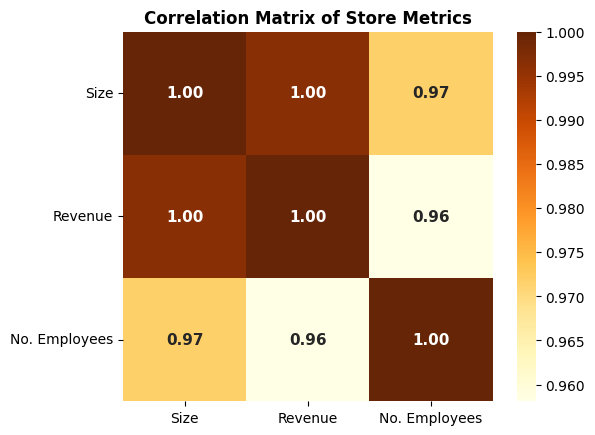

In [32]:
#Establish correlation of dataframe fields and define the new variable as 'corr_heatmap_matrix'
corr_heatmap_matrix = corr_heatmap_data.corr()

#Heatmap colour, shape and annotation customization
sb.heatmap(corr_heatmap_matrix, 
           cmap='YlOrBr', 
           square=True, 
           annot=True, 
           fmt='.2f', 
           annot_kws={'fontsize':11, 'fontweight':'bold'})

#Heatmap title and tick customization
plt.title('Correlation Matrix of Store Metrics', fontweight = 'bold')
plt.yticks([0.5, 1.5, 2.5], ['Size', 'Revenue', 'No. Employees'], rotation=0)
plt.xticks([0.5, 1.5, 2.5], ['Size', 'Revenue', 'No. Employees'], rotation=0)

plt.show()

In [33]:
query_2 = """SELECT ss.BusinessEntityID, ss.Name, sa.AddressType, sd.AnnualRevenue, sd.NumberEmployees, sd.AnnualRevenue / sd.NumberEmployees RevenueEmpNo, sd.SquareFeet, sd.AnnualRevenue / sd.SquareFeet RevenueSqFt 
FROM Sales.Store ss

LEFT JOIN Sales.vStoreWithAddresses sa
ON ss.BusinessEntityID = sa.BusinessEntityID

LEFT JOIN sales.vStoreWithDemographics sd
ON ss.BusinessEntityID = sd.BusinessEntityID

WHERE sa.AddressType = 'Main Office' 
ORDER BY sd.AnnualRevenue;"""

In [34]:
rev_emp_size_data = pd.read_sql(query_2, conn)

C:\Users\Lewis\AppData\Local\Temp\ipykernel_35040\734754454.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rev_emp_size_data = pd.read_sql(query_2, conn)


In [35]:
print(rev_emp_size_data)

     BusinessEntityID                           Name  AddressType  \
0                 320  Metropolitan Sales and Rental  Main Office   
1                 444              Fourth Bike Store  Main Office   
2                 406              Kickstand Sellers  Main Office   
3                 820                  Weekend Tours  Main Office   
4                1086             Seventh Bike Store  Main Office   
..                ...                            ...          ...   
696               808         Registered Cycle Store  Main Office   
697              1960                   Sports Store  Main Office   
698              1964                 Extended Tours  Main Office   
699              1832   Downhill Bicycle Specialists  Main Office   
700              1844    Metropolitan Bicycle Supply  Main Office   

     AnnualRevenue  NumberEmployees  RevenueEmpNo  SquareFeet  RevenueSqFt  
0          30000.0                4     7500.0000        6000       5.0000  
1          30000.

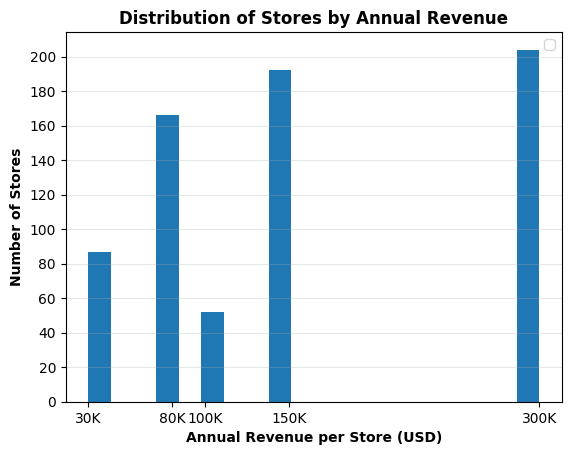

In [36]:
#Histogram to investigate distribution of annual revenue by all stores.
rev_emp_size_data.plot.hist(y='AnnualRevenue', bins=20)

#Histogram title, axis labels and key customization
plt.title('Distribution of Stores by Annual Revenue', fontweight = 'bold')
plt.ylabel('Number of Stores', fontweight = 'bold')
plt.xlabel('Annual Revenue per Store (USD)', fontweight = 'bold')

#Histogram grid customization
plt.grid(axis='y', alpha=0.3)

#Histogram legend customization
plt.legend([])

#Histogram axis scales customization
plt.xticks([3e4, 8e4, 10e4, 15e4, 30e4], ['30K', '80K', '100K', '150K', '300K'])
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

plt.show()

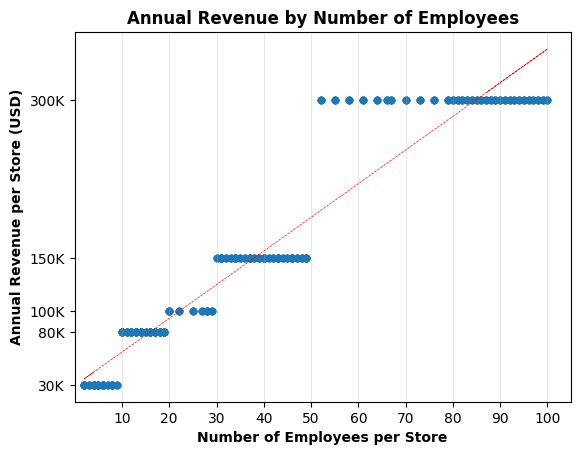

In [37]:
#Scatterplot to investigate relationship between no. of employees and annual revenue
rev_emp_size_data.plot.scatter(x='NumberEmployees',y='AnnualRevenue')

#Scatterplot title and axis label customization
plt.title('Annual Revenue by Number of Employees', fontweight = 'bold')
plt.ylabel('Annual Revenue per Store (USD)', fontweight = 'bold')
plt.xlabel('Number of Employees per Store', fontweight = 'bold')

#Scatterplot grid customization
plt.grid(axis='x', alpha=0.3)

#Scatterplot axis tick customization
plt.yticks([3e4, 8e4, 10e4, 15e4, 30e4], ['30K', '80K', '100K', '150K', '300K'])
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlim(0)

#Scatterplot trendline customization
z = np.polyfit(rev_emp_size_data['NumberEmployees'], rev_emp_size_data['AnnualRevenue'], 1)
p = np.poly1d(z)
plt.plot(rev_emp_size_data['NumberEmployees'],p(rev_emp_size_data['NumberEmployees']), 
         color='red', 
         linewidth=0.5, 
         linestyle='dashed')

plt.show()

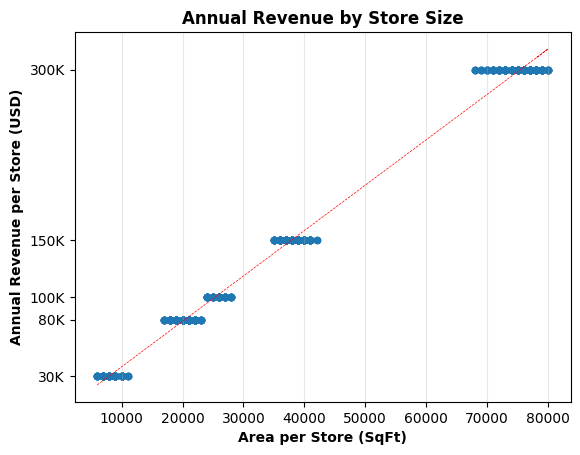

In [38]:
#Scatterplot to investigate relationship between square footage of stores and annual revenue.
rev_emp_size_data.plot.scatter(x='SquareFeet',y='AnnualRevenue')

#Scatterplot title, axis label and grid customization
plt.title('Annual Revenue by Store Size', fontweight = 'bold')
plt.ylabel('Annual Revenue per Store (USD)', fontweight = 'bold')
plt.xlabel('Area per Store (SqFt)', fontweight = 'bold')
plt.grid(axis='x', alpha=0.3)

#Scatterplot axis label customization
plt.yticks([3e4, 8e4, 10e4, 15e4, 30e4], ['30K', '80K', '100K', '150K', '300K'])

#Scatterplot trendline customization
z = np.polyfit(rev_emp_size_data['SquareFeet'], rev_emp_size_data['AnnualRevenue'], 1)
p = np.poly1d(z)
plt.plot(rev_emp_size_data['SquareFeet'],p(rev_emp_size_data['SquareFeet']), 
         color='red', 
         linewidth=0.5, 
         linestyle='dashed')


plt.show()

([<matplotlib.axis.XTick at 0x229fd9f01d0>,
 [Text(3000, 0, '3000'),
  Text(5000, 0, '5000'),
  Text(7000, 0, '7000'),
  Text(9000, 0, '9000'),
  Text(11000, 0, '11000'),
  Text(13000, 0, '13000'),
  Text(15000, 0, '15000')])

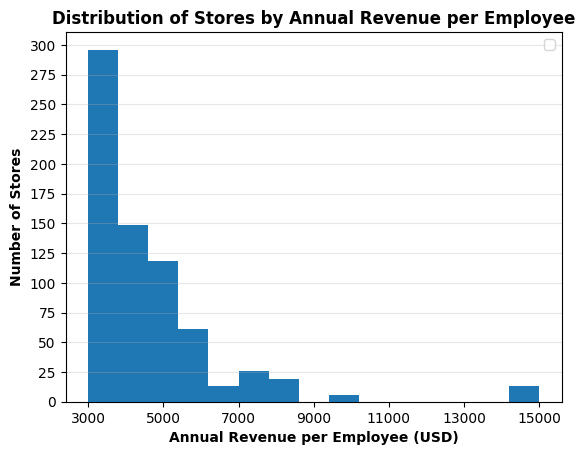

In [40]:
#Histogram to investigate relationship between Revenue/SqFt and store annual revenue.
rev_emp_size_data.plot.hist(y='RevenueEmpNo', bins=15)

#Histogram title, axis labels and key customization
plt.title('Distribution of Stores by Annual Revenue per Employee', fontweight = 'bold')
plt.ylabel('Number of Stores', fontweight = 'bold')
plt.xlabel('Annual Revenue per Employee (USD)', fontweight = 'bold')

#Histogram grid customization
plt.grid(axis='y', alpha=0.3)

#Histogram legend customization
plt.legend([])

#Histogram axis tick customization
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
plt.xticks([3000, 5000, 7000, 9000, 11000, 13000, 15000])

([<matplotlib.axis.XTick at 0x229fdada0d0>,
 [Text(2.75, 0, '2.75'),
  Text(3.0, 0, '3.00'),
  Text(3.25, 0, '3.25'),
  Text(3.5, 0, '3.50'),
  Text(3.75, 0, '3.75'),
  Text(4.0, 0, '4.00'),
  Text(4.25, 0, '4.25'),
  Text(4.5, 0, '4.50'),
  Text(4.75, 0, '4.75'),
  Text(5.0, 0, '5.00')])

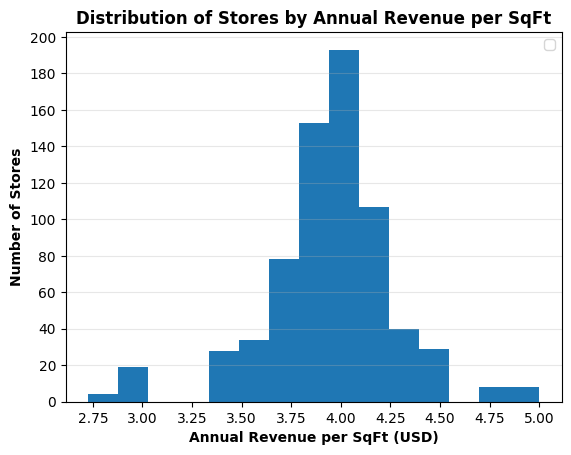

In [41]:
#Histogram to investigate relationship between Revenue/SqFt and store annual revenue.
rev_emp_size_data.plot.hist(y='RevenueSqFt', bins=15)

#Histogram title, axis labels and key customization
plt.title('Distribution of Stores by Annual Revenue per SqFt', fontweight = 'bold')
plt.ylabel('Number of Stores', fontweight = 'bold')
plt.xlabel('Annual Revenue per SqFt (USD)', fontweight = 'bold')

#Histogram grid customization
plt.grid(axis='y', alpha=0.3)

#Histogram legend customization
plt.legend([])

#Histogram axis tick customization
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
plt.xticks([2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])